In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ice-cream-sales-dataset/Ice Cream.csv


In [10]:
df = pd.read_csv("/kaggle/input/ice-cream-sales-dataset/Ice Cream.csv")
df.head()

,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317


In [11]:
df.shape

(500, 2)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [13]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.281600,522.058000
std,8.097597,175.410399
min,0.000000,10.000000
25%,17.175000,406.000000
50%,22.400000,530.000000
75%,27.800000,643.000000
max,45.000000,1000.000000


In [14]:
X = df['Temperature'].values.reshape(-1, 1)
Y = df['Revenue'].values.reshape(-1, 1)

In [15]:
theta0 = 0
theta1 = 0
alpha = 0.0005
iterations = 10000
m = len(X)

In [16]:
for i in range(iterations):
    Y_pred = theta0 + theta1 * X
    d_theta0 = (1/m) * np.sum(Y_pred - Y)
    d_theta1 = (1/m) * np.sum((Y_pred - Y) * X)
    theta0 = theta0 - alpha * d_theta0
    theta1 = theta1 - alpha * d_theta1

In [17]:

print(f"θ0 (intercept): {theta0}")
print(f"θ1 (slope): {theta1}")
print(f"Equation: Revenue = {theta0:.2f} + {theta1:.2f} × Temperature")


θ0 (intercept): 20.04347857701608
θ1 (slope): 22.403885573988312
Equation: Revenue = 20.04 + 22.40 × Temperature


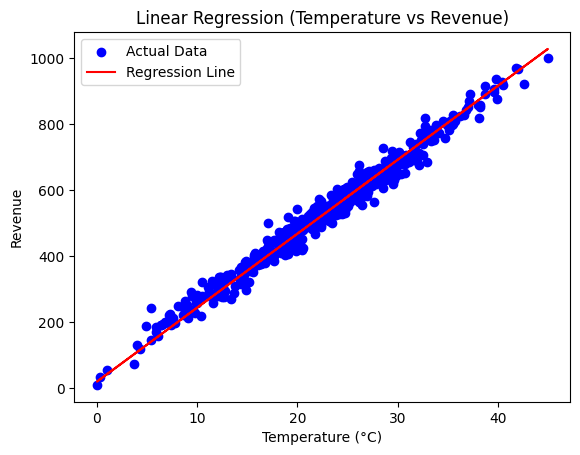

In [19]:
import matplotlib.pyplot as plt
Y_pred = theta0 + theta1 * X
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('Temperature (°C)')
plt.ylabel('Revenue')
plt.title('Linear Regression (Temperature vs Revenue)')
plt.legend()
plt.show()

In [20]:
new_temp = float(input("\nEnter a temperature (°C) to predict revenue: "))
predicted_revenue = theta0 + theta1 * new_temp
print(f"Predicted Revenue at {new_temp}°C = {predicted_revenue:.2f}")


Enter a temperature (°C) to predict revenue:  50


Predicted Revenue at 50.0°C = 1140.24
